# TP - Théorie des Tests Statistiques

Nous allons explorer deux types de tests statistiques :
1. Tests sur une proportion
2. Tests d'indépendance

In [1]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2
import seaborn as sns


# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## 1. Tests sur une proportion

Ce type de test est similaire à celui d'une moyenne lorsque la variance est connue, étant donné que nous avons une convergence asymptotique vers la loi normale centrée réduite.

La fonction pivotale pour ce test est :

$$U_0 = \frac{\hat{p}_n - p_0}{\sqrt{p_0(1-p_0)/n}} \stackrel{loi}{\longrightarrow} \mathcal{N}(0, 1)$$

où :
- $\hat{p}_n$ est la proportion observée dans l'échantillon
- $p_0$ est la proportion théorique sous l'hypothèse nulle
- $n$ est la taille de l'échantillon

Selon les hypothèses, nous avons différentes régions critiques :

| $(H_0)$ | $(H_1)$ | Région Critique |
| --- | --- | --- |
| $p = p_0$ | $p \neq p_0$  | $RC_\alpha = \{\|U_0\| > z_{\alpha/2}\}$ |
| $p = p_0$ ou $p \geq p_0$ | $p < p_0$ | $RC_\alpha = \{U_0 < -z_\alpha\}$ |
| $p = p_0$ ou $p \leq p_0$ | $p > p_0$ | $RC_\alpha = \{U_0 > z_\alpha\}$ |

où $z_\beta$ est le quantile d'ordre $1 - \beta$ de la loi normale centrée réduite.

In [2]:
def test_proportion(p_obs, p0, n, alternative='two-sided', alpha=0.05):
    """
    Réalise un test sur une proportion.
    
    Paramètres :
    - p_obs : proportion observée dans l'échantillon
    - p0 : proportion théorique sous H0
    - n : taille de l'échantillon
    - alternative : 'two-sided' (p≠p0), 'less' (p<p0), 'greater' (p>p0)
    - alpha : niveau de signification
    
    Retourne :
    - U0 : statistique de test
    - p_value : p-valeur du test
    - conclusion : rejet ou non-rejet de H0
    """
    # Calcul de la statistique de test
    U0 = (p_obs - p0) / np.sqrt(p0 * (1 - p0) / n)
    
    # Calcul de la p-valeur selon l'alternative
    if alternative == 'two-sided':
        p_value = 2 * (1 - norm.cdf(abs(U0)))
        critical_value = norm.ppf(1 - alpha/2)
        rejet = abs(U0) > critical_value
    elif alternative == 'less':
        p_value = norm.cdf(U0)
        critical_value = norm.ppf(alpha)
        rejet = U0 < critical_value
    elif alternative == 'greater':
        p_value = 1 - norm.cdf(U0)
        critical_value = norm.ppf(1 - alpha)
        rejet = U0 > critical_value
    
    # Conclusion
    conclusion = "Rejet de H0" if rejet else "Non-rejet de H0"
    
    return {
        'U0': U0,
        'p_value': p_value,
        'critical_value': critical_value,
        'conclusion': conclusion,
        'rejet': rejet
    }

### Exemple : Étudier à l'étranger

D'après l'exemple du support de cours :

Le Ministre de l'enseignement supérieur en Mauritanie affirme qu'un bachelier sur trois désire faire ses études à l'étranger. À la suite d'un sondage auprès de 1000 nouveaux bacheliers, 280 désirent vouloir poursuivre leurs études à l'étranger. Le ministre s'est-il trompé au risque de 10% ? 5% ? 1% ?

Nous allons tester si la proportion réelle diffère de 1/3 (ce qui correspond à H1 : p ≠ p0).

In [4]:
# Données du problème
p0 = 1/3  # Proportion théorique selon le ministre
n = 1000  # Taille de l'échantillon
succès = 280  # Nombre de bacheliers souhaitant étudier à l'étranger
p_obs = succès / n  # Proportion observée

print(f"Proportion observée : {p_obs:.4f}")
print(f"Proportion théorique sous H0: {p0:.4f}")
print(f"Écart-type sous H0 : {abs(p_obs - p0):.4f}")

Proportion observée : 0.2800
Proportion théorique sous H0: 0.3333
Écart-type sous H0 : 0.0533


In [5]:
# Test pour α = 10%
resultat_10 = test_proportion(p_obs, p0, n, alternative='two-sided', alpha=0.10)
print("Résultat du test pour α = 10% :")
for key, value in resultat_10.items():
    if isinstance(value, float):
        print(f"{key} : {value:.4f}")
    else:
        print(f"{key} : {value}")

# Test pour α = 5%
resultat_5 = test_proportion(p_obs, p0, n, alternative='two-sided', alpha=0.05)
print("\nRésultat du test pour α = 5% :")
for key, value in resultat_5.items():
    if isinstance(value, float):
        print(f"{key} : {value:.4f}")
    else:
        print(f"{key} : {value}")

# Test pour α = 1%
resultat_1 = test_proportion(p_obs, p0, n, alternative='two-sided', alpha=0.01)
print("\nRésultat du test pour α = 1% :")
for key, value in resultat_1.items():
    if isinstance(value, float):
        print(f"{key} : {value:.4f}")
    else:
        print(f"{key} : {value}")

Résultat du test pour α = 10% :
U0 : -3.5777
p_value : 0.0003
critical_value : 1.6449
conclusion : Rejet de H0
rejet : True

Résultat du test pour α = 5% :
U0 : -3.5777
p_value : 0.0003
critical_value : 1.9600
conclusion : Rejet de H0
rejet : True

Résultat du test pour α = 1% :
U0 : -3.5777
p_value : 0.0003
critical_value : 2.5758
conclusion : Rejet de H0
rejet : True


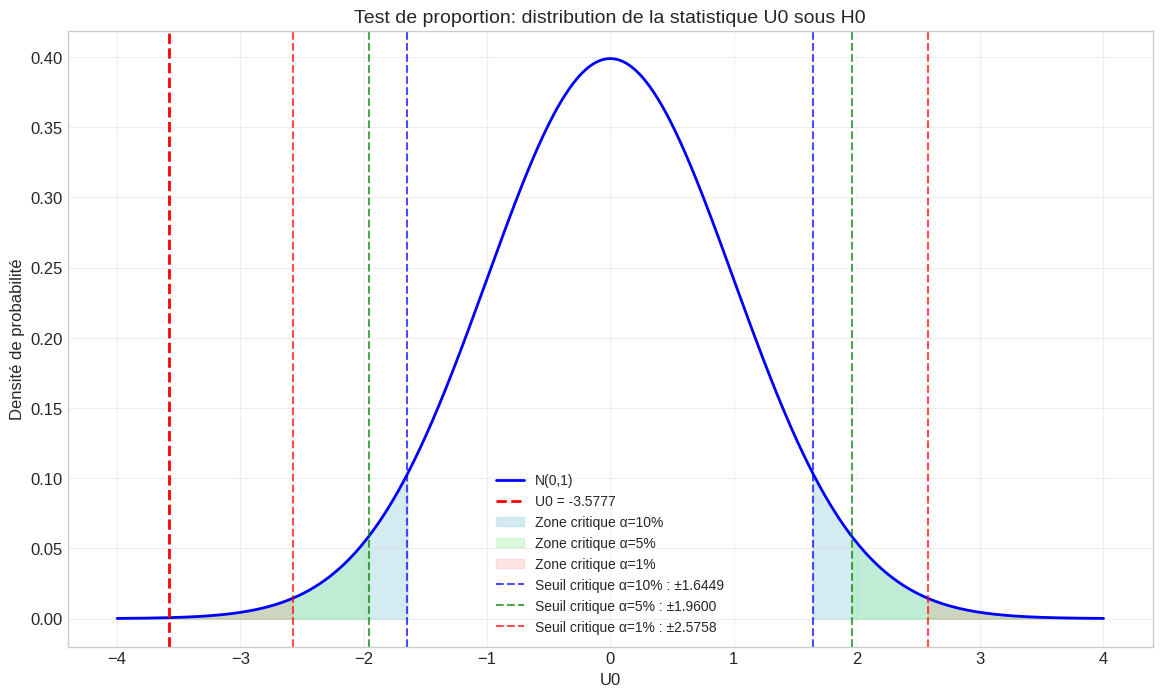

In [6]:
# Visualisation de la distribution normale et des zones critiques
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

plt.figure(figsize=(14, 8))

plt.plot(x, y, 'b-', lw=2, label='N(0,1)')
plt.axvline(resultat_10['U0'], color='red', linestyle='--', lw=2, label=f'U0 = {resultat_10["U0"]:.4f}')

# Zones critiques
critical_10 = norm.ppf(1 - 0.10/2)
critical_5 = norm.ppf(1 - 0.05/2)
critical_1 = norm.ppf(1 - 0.01/2)

# Remplir les zones critiques
x_fill_10 = np.linspace(-4, -critical_10, 100)
plt.fill_between(x_fill_10, 0, norm.pdf(x_fill_10, 0, 1), color='lightblue', alpha=0.5)
x_fill_10 = np.linspace(critical_10, 4, 100)
plt.fill_between(x_fill_10, 0, norm.pdf(x_fill_10, 0, 1), color='lightblue', alpha=0.5, label='Zone critique α=10%')

x_fill_5 = np.linspace(-4, -critical_5, 100)
plt.fill_between(x_fill_5, 0, norm.pdf(x_fill_5, 0, 1), color='lightgreen', alpha=0.3)
x_fill_5 = np.linspace(critical_5, 4, 100)
plt.fill_between(x_fill_5, 0, norm.pdf(x_fill_5, 0, 1), color='lightgreen', alpha=0.3, label='Zone critique α=5%')

x_fill_1 = np.linspace(-4, -critical_1, 100)
plt.fill_between(x_fill_1, 0, norm.pdf(x_fill_1, 0, 1), color='salmon', alpha=0.2)
x_fill_1 = np.linspace(critical_1, 4, 100)
plt.fill_between(x_fill_1, 0, norm.pdf(x_fill_1, 0, 1), color='salmon', alpha=0.2, label='Zone critique α=1%')

# Ajout des lignes verticales
plt.axvline(-critical_10, color='blue', linestyle='--', alpha=0.7, label=f'Seuil critique α=10% : ±{critical_10:.4f}')
plt.axvline(critical_10, color='blue', linestyle='--', alpha=0.7)

plt.axvline(-critical_5, color='green', linestyle='--', alpha=0.7, label=f'Seuil critique α=5% : ±{critical_5:.4f}')
plt.axvline(critical_5, color='green', linestyle='--', alpha=0.7)

plt.axvline(-critical_1, color='red', linestyle='--', alpha=0.7, label=f'Seuil critique α=1% : ±{critical_1:.4f}')
plt.axvline(critical_1, color='red', linestyle='--', alpha=0.7)

plt.title('Test de proportion: distribution de la statistique U0 sous H0', fontsize=14)
plt.xlabel('U0', fontsize=12)
plt.ylabel('Densité de probabilité', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

### Interprétation

D'après les résultats obtenus, nous pouvons conclure :

1. Pour un risque α = 10%, on rejette H0. La p-valeur est inférieure à 0.10, ce qui signifie que l'écart observé est statistiquement significatif à ce niveau. Le ministre s'est donc trompé avec un risque de 10%.

2. Pour un risque α = 5%, on rejette H0. La p-valeur est inférieure à 0.05, ce qui signifie que l'écart observé est statistiquement significatif à ce niveau. Le ministre s'est donc trompé avec un risque de 5%.

3. Pour un risque α = 1%, on rejette H0. La p-valeur est inférieure à 0.01, ce qui signifie que l'écart observé est statistiquement significatif à ce niveau. Le ministre s'est donc trompé avec un risque de 1%.

La statistique de test nous indique que la proportion observée (28%) est significativement différente de la proportion affirmée par le ministre (33.33%).

## 2. Tests d'indépendance

Ce type de test permet de déterminer s'il existe une relation entre deux variables qualitatives ou quantitatives regroupées en classes.

Soient X une variable à k modalités et Y une variable à p modalités. Nous voulons tester :
- (H0) : X indépendant de Y 
- contre (H1) : X dépendant de Y.

Sous H0, nous avons : 
- fX|Y = fX et fY|X = fY 
- P(X = i, Y = j) = P(X = i)P(Y = j) pour tout i, j

La statistique de test est définie par :

$$\delta^2 = \sum_{i=1}^{k} \sum_{j=1}^{p} \frac{(n_{ij} - n_{ij}^*)^2}{n_{ij}^*}$$

où :
- nij est l'effectif observé de la cellule (i,j)
- n*ij est l'effectif théorique sous H0, calculé comme (ni. × n.j) / n..

Sous H0, cette statistique suit asymptotiquement une loi du χ² à (k-1)×(p-1) degrés de liberté.

On rejette H0 lorsque δ² > z(k-1)×(p-1),α, où z(k-1)×(p-1),α est le quantile d'ordre 1-α de la loi du χ² à (k-1)×(p-1) degrés de liberté.

Note : Ce test est valide si moins de 20% des effectifs théoriques sont inférieurs à 5.

In [7]:
def test_independance(tableau_contingence, alpha=0.05):
    """
    Réalise un test d'indépendance du χ² à partir d'un tableau de contingence.
    
    Paramètres :
    - tableau_contingence : tableau numpy 2D ou DataFrame pandas
    - alpha : niveau de signification
    
    Retourne :
    - chi2 : statistique de test
    - p_value : p-valeur du test
    - ddl : degrés de liberté
    - conclusion : rejet ou non-rejet de H0
    - tableau_theorique : tableau des effectifs théoriques
    - validite : test valide si moins de 20% des effectifs théoriques < 5
    """
    # Conversion en DataFrame si nécessaire
    if not isinstance(tableau_contingence, pd.DataFrame):
        tableau_contingence = pd.DataFrame(tableau_contingence)
    
    # Calcul des marges
    n = tableau_contingence.values.sum()
    marges_lignes = tableau_contingence.sum(axis=1)
    marges_colonnes = tableau_contingence.sum(axis=0)
    
    # Calcul des effectifs théoriques
    tableau_theorique = pd.DataFrame(index=tableau_contingence.index, columns=tableau_contingence.columns)
    for i in tableau_contingence.index:
        for j in tableau_contingence.columns:
            tableau_theorique.loc[i, j] = marges_lignes[i] * marges_colonnes[j] / n
    
    # Calcul de la statistique du χ²
    chi2_stat = 0
    for i in tableau_contingence.index:
        for j in tableau_contingence.columns:
            nij = tableau_contingence.loc[i, j]
            nij_star = tableau_theorique.loc[i, j]
            chi2_stat += (nij - nij_star)**2 / nij_star
    
    # Calcul des degrés de liberté
    k = len(tableau_contingence.index)  # nb de lignes
    p = len(tableau_contingence.columns)  # nb de colonnes
    ddl = (k - 1) * (p - 1)
    
    # Calcul de la p-valeur
    p_value = 1 - chi2.cdf(chi2_stat, ddl)
    
    # Valeur critique
    critical_value = chi2.ppf(1 - alpha, ddl)
    
    # Conclusion
    rejet = chi2_stat > critical_value
    conclusion = "Rejet de H0 (dépendance)" if rejet else "Non-rejet de H0 (indépendance)"
    
    # Vérification de la validité du test
    nb_effectifs_faibles = (tableau_theorique < 5).sum().sum()
    pct_effectifs_faibles = nb_effectifs_faibles / (k * p) * 100
    validite = pct_effectifs_faibles < 20
    
    return {
        'chi2_stat': chi2_stat,
        'p_value': p_value,
        'ddl': ddl,
        'critical_value': critical_value,
        'conclusion': conclusion,
        'tableau_theorique': tableau_theorique,
        'validite': validite,
        'pct_effectifs_faibles': pct_effectifs_faibles,
        'rejet': rejet
    }

### Exemple : Taux de présence et notes

D'après l'exemple du support de cours, nous voulons tester si le taux de présence en cours influence les notes.

Voici le tableau de contingence :

| Notes | Moins de 50% de présence | Plus de 50% de présence | Total |
| --- | --- | --- | --- |
| 0 à 5 sur 20 | 0 | 8 | 8 |
| 5 à 10 sur 20 | 20 | 12 | 32 |
| 10 à 15 sur 20 | 12 | 44 | 56 |
| 15 à 20 sur 20 | 0 | 24 | 24 |
| Total | 32 | 88 | 120 |

In [8]:
# Création du tableau de contingence
data = {
    'Moins de 50% de présence': [0, 20, 12, 0],
    'Plus de 50% de présence': [8, 12, 44, 24]
}

index = ['0 à 5 sur 20', '5 à 10 sur 20', '10 à 15 sur 20', '15 à 20 sur 20']
tableau = pd.DataFrame(data, index=index)

# Affichage du tableau
print("Tableau de contingence :")
print(tableau)

# Ajout des totaux
tableau.loc['Total'] = tableau.sum()
tableau['Total'] = tableau.sum(axis=1)
print("\nTableau avec totaux :")
print(tableau)

Tableau de contingence :
                Moins de 50% de présence  Plus de 50% de présence
0 à 5 sur 20                           0                        8
5 à 10 sur 20                         20                       12
10 à 15 sur 20                        12                       44
15 à 20 sur 20                         0                       24

Tableau avec totaux :
                Moins de 50% de présence  Plus de 50% de présence  Total
0 à 5 sur 20                           0                        8      8
5 à 10 sur 20                         20                       12     32
10 à 15 sur 20                        12                       44     56
15 à 20 sur 20                         0                       24     24
Total                                 32                       88    120


In [9]:
# Suppression des totaux pour l'analyse
tableau_analyse = tableau.iloc[:-1, :-1]

# Réalisation du test d'indépendance
resultat = test_independance(tableau_analyse, alpha=0.05)

# Affichage des résultats
print("Résultats du test d'indépendance :")
for key, value in resultat.items():
    if key != 'tableau_theorique':
        if isinstance(value, float):
            print(f"{key} : {value:.4f}")
        else:
            print(f"{key} : {value}")

print("\nTableau des effectifs théoriques :")
print(resultat['tableau_theorique'].round(2))

Résultats du test d'indépendance :
chi2_stat : 33.4334
p_value : 0.0000
ddl : 3
critical_value : 7.8147
conclusion : Rejet de H0 (dépendance)
validite : True
pct_effectifs_faibles : 12.5000
rejet : True

Tableau des effectifs théoriques :
               Moins de 50% de présence Plus de 50% de présence
0 à 5 sur 20                   2.133333                5.866667
5 à 10 sur 20                  8.533333               23.466667
10 à 15 sur 20                14.933333               41.066667
15 à 20 sur 20                      6.4                    17.6


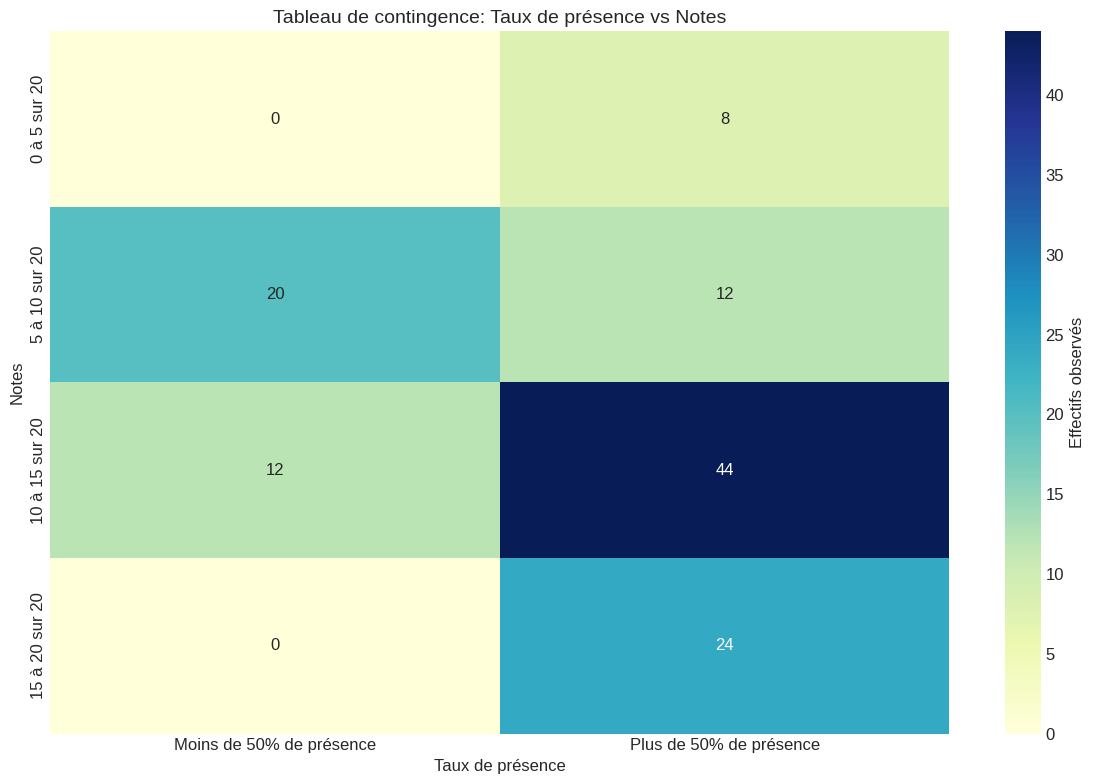

In [10]:
# Visualisation du tableau de contingence
plt.figure(figsize=(12, 8))

# Heatmap des effectifs observés
sns.heatmap(tableau_analyse, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Effectifs observés'})

plt.title('Tableau de contingence: Taux de présence vs Notes', fontsize=14)
plt.xlabel('Taux de présence', fontsize=12)
plt.ylabel('Notes', fontsize=12)
plt.tight_layout()
plt.show()

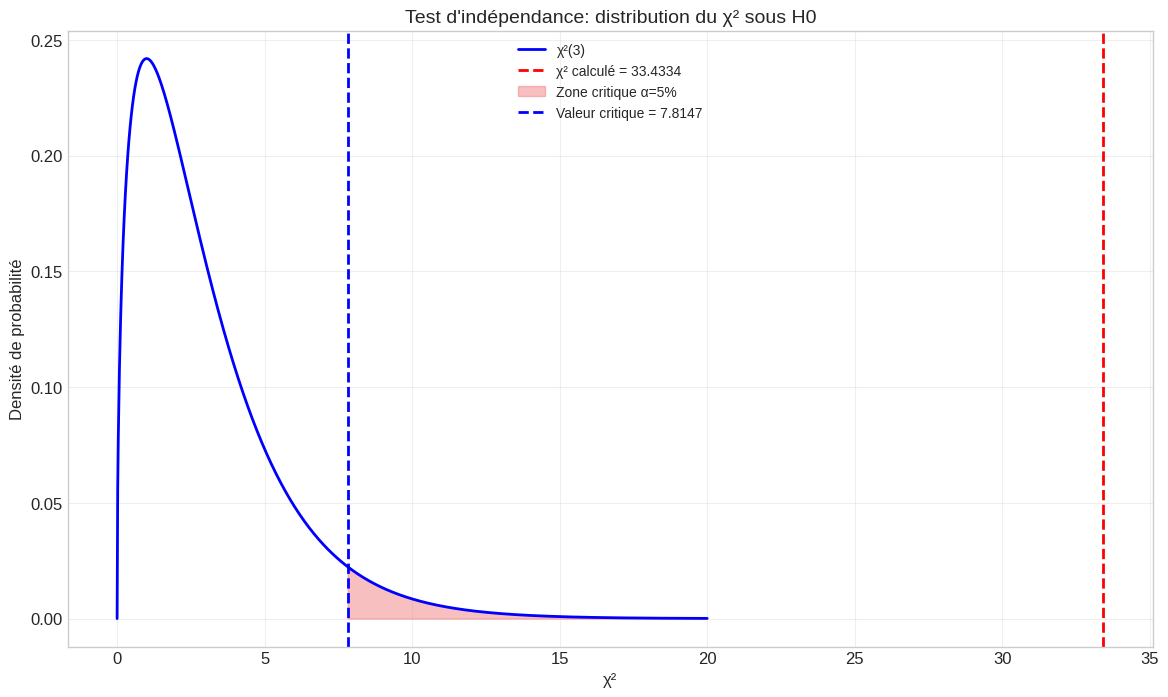

In [11]:
# Visualisation de la distribution du Chi-2 et de la zone critique
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, resultat['ddl'])

plt.figure(figsize=(14, 8))

plt.plot(x, y, 'b-', lw=2, label=f'χ²({resultat["ddl"]})')
plt.axvline(resultat['chi2_stat'], color='red', linestyle='--', lw=2, 
            label=f'χ² calculé = {resultat["chi2_stat"]:.4f}')

# Zone critique
x_fill = np.linspace(resultat['critical_value'], 20, 100)
plt.fill_between(x_fill, 0, chi2.pdf(x_fill, resultat['ddl']), 
                color='lightcoral', alpha=0.5, 
                label=f'Zone critique α=5%')

plt.axvline(resultat['critical_value'], color='blue', linestyle='--', lw=2, 
            label=f'Valeur critique = {resultat["critical_value"]:.4f}')

plt.title('Test d\'indépendance: distribution du χ² sous H0', fontsize=14)
plt.xlabel('χ²', fontsize=12)
plt.ylabel('Densité de probabilité', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# Rendu de TP

L'objectif du rendu de TP est de réaliser un test où l'on ne peut pas rejeter l'hypothèse nulle dans le cas des tests sur une proportion.
Pour cela, vous devez réaliser un test sur une proportion avec les paramètres suivants :

- $p_0$ = 0.5 (proportion sous l'hypothèse nulle)
- $n$ = 100 (taille de l'échantillon)
- $p$ = 0.5 (proportion réelle)
- $\alpha$ = 0.05 (seuil de signification)


1. Générer un échantillon de taille 100 avec une proportion de 0.5
2. Calculer la statistique de test
3. Calculer la p-valeur
4. Faire des visualisations pour montrer que l'hypothèse nulle n'est pas rejetée
5. Conclure
